# Optimisation

This notebook uses the following four optimisation methods to optimise the two different target functions below:
- Random Search
- Hill Climbing
- Gradient Descent
- Simulated Annealing  

Functions:
- y = (x - 1)^2
- y = x(x + 1.5)(x - 1.5)(x - 2)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import random
import numpy as np
import math

## Plotting Functions
First I am going to create values for functions 1 and 2 and plot them so I can see the shape of the functions.

In [17]:
x1_list = np.linspace(-10,10,100)
y1_list = [(x - 1)**2 for x in x1_list]

x2_list = np.linspace(-2,3,100)
y2_list = [x*(x + 1.5)*(x - 1.5)*(x - 2) for x in x2_list]

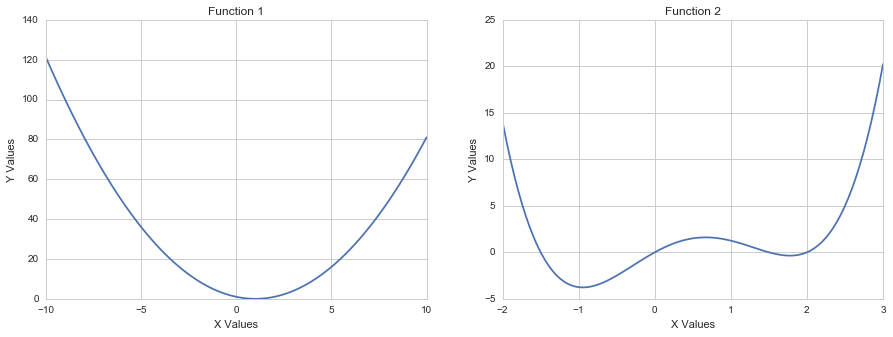

In [16]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(121)
ax1.plot(x1_list, y1_list)
ax1.set_xlabel('X Values')
ax1.set_ylabel('Y Values')
ax1.set_title('Function 1')

ax2 = fig.add_subplot(122)
ax2.plot(x2_list, y2_list)
ax2.set_xlabel('X Values')
ax2.set_ylabel('Y Values')
ax2.set_title('Function 2')

In function 1 the y value will continue to increase so the global minimum is the point (1, 0). In function 2 there are two minima - a local minimum at approximately (1.7,-0.1) and a global minimum at about (-0.9, -3.5).   

Out of the optimisation algorithms I am using, only simulated annealing and random chance are likely to fine the global minimum for function 2 - hill climbing and gradient descent are likely to get stuck in the local minimum.

## Random Search
This method uses randomly generated points to find the minimum y value for each function. Each time the search reaches a new point it compares it with the best point so far. If the new point is better (i.e. has a lower y value) then the new point becomes the best point. This continues until the required number of points has been reached. The best point found is returned.

In [19]:
# Given a value for x return a y value for function 1 
def get_yf1(x):
    return (x - 1)**2

def get_yf2(x):
    return x*(x + 1.5)*(x - 1.5)*(x - 2)

# Returns a random point given a start x and function as input
def get_random_point(start_x, function):
    if function == 'f1':
        x = random.uniform(start_x-10, start_x+10)
        y = get_yf1(x)
    elif function == 'f2':
        x = random.uniform(start_x-3, start_x+3)
        y = get_yf2(x)
    else:
        return Error
    return x, y

# Carries out random search of specified number(num_point) of random points and returns the best
def random_search(start_x, num_points, function):
    best = get_random_point(start_x, function) 
    point_count = 0
    while point_count < num_points:
        new_point = get_random_point(start_x, function)
        points = plt.scatter(new_point[0], new_point[1])
        if new_point[1] < best[1]:
            best = new_point
        point_count += 1
    points = plt.scatter(best[0], best[1], color = 'magenta')
    points = plt.xlabel('X Values')
    points = plt.ylabel('Y Values')
    points = plt.title('Points Examined in Random Search {}'.format(function))
    return best

In [20]:
# function to get the performance for each num_of points and return a list of the best y value for each
def get_random_search_performance(start_x, num_points_list, function):
    best_list = []
    for num_points in num_points_list:
        best_y = random_search(start_x, num_points, function)[1]
        best_list.append(best_y)
    return best_list


### Plotting the Points Examined - Random Search
**Plot the points examined for Function 1 when x = 0**

 Best point: (1.0440435151743301, 0.0019398312289114492)


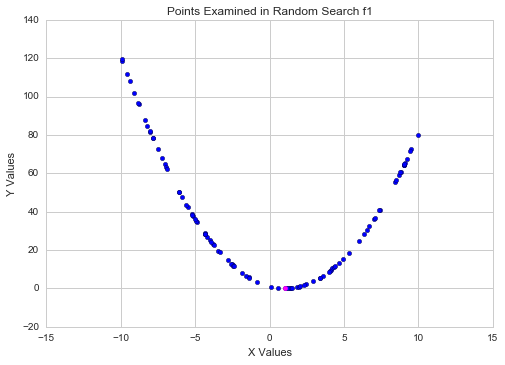

In [23]:
# Set random seed
random.seed(127)

# plot points examined when x = 0
best_point = random_search(0, 100, 'f1')
print 'Best point:', best_point

**Plot the points examined for Function 2 when x = 0**

Best point: (-0.9180706906050693, -3.7697378980271496)


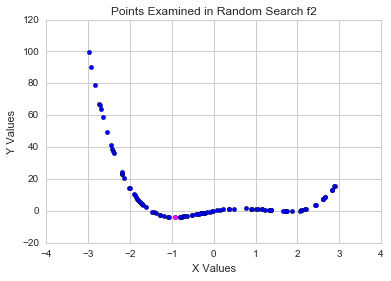

In [27]:
# plot points examined when x = 0
best_point = random_search(0, 100, 'f2')
print 'Best point:', best_point

**Plot the points examined for Function 2 when x = 1**

Best point: (-0.9443418453550014, -3.7764792309197692)


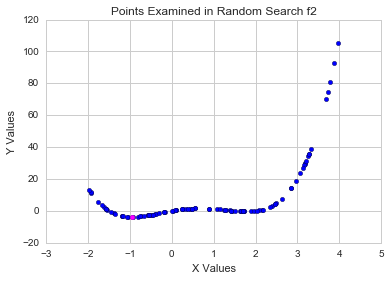

In [28]:
best_point = random_search(1, 100, 'f2')
print 'Best point:', best_point

The above plots show the points examined when the random search optimisation function is run for 100 points for each function starting at x =0 for F1 and x = 0 and x = 1 for F2.  
The plot shows that the random search looks at points all over the function. As expected, local optima don't make any difference. The random search does find the global minimum or points very close to it. The best point found by each is plotted in magenta and the co-ordinates printed above the graph.

### Performance over Time - Random Search


** Function 1**  
Plot performance over time for Function 1 starting at x = 0 running with number of points specified in num_points_list.

List of best Y value for each number of points: [2.18465494474368, 0.07897426100901432, 5.566065294516497, 0.0019398312289114492, 0.026240374455296915, 0.0025366461248214887, 4.68794458560504e-06, 0.00014052298596308287, 0.00011533727315678655, 7.152682121570642e-05]


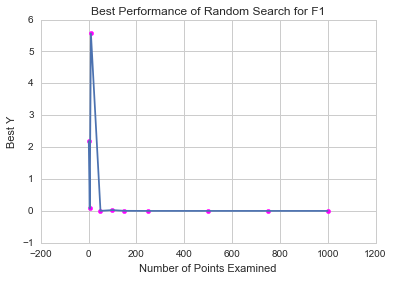

In [29]:
# Set random seed
random.seed(127)
# initialise a list of number of points to check
num_points_list = [1, 5, 10, 50, 100, 150, 250, 500, 750, 1000]
 
# plot performance
best_y_list = get_random_search_performance(0, num_points_list, 'f1')
print 'List of best Y value for each number of points:', best_y_list
plt.clf()
perf = plt.scatter(num_points_list, best_y_list, color = 'magenta')
perf = plt.plot(num_points_list, best_y_list)
perf = plt.xlabel('Number of Points Examined')
perf = plt.ylabel('Best Y')
perf = plt.title('Best Performance of Random Search for F1')

**Function 2**  
Plot the performance for function 2, starting at x = 0 and list of number of points to use on each iteration.

List of best Y value for each number of points: [1.585587464926919, -3.0827322384087528, -3.4655957239611044, -3.555305833931481, -3.7697378980271496, -3.7750395203600338, -3.7764183895198133, -3.776302928152996, -3.7764664473238683, -3.7760242170504354]


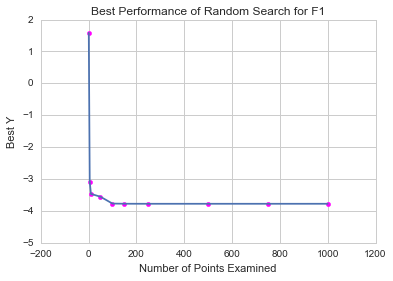

In [30]:
# Set random seed
random.seed(127)
# initialise a list of number of points to check
num_points_list = [1, 5, 10, 50, 100, 150, 250, 500, 750, 1000]
 
# plot performance
best_y_list = get_random_search_performance(0, num_points_list, 'f2')
print 'List of best Y value for each number of points:', best_y_list
plt.clf()
perf = plt.scatter(num_points_list, best_y_list, color = 'magenta')
perf = plt.plot(num_points_list, best_y_list)
perf = plt.xlabel('Number of Points Examined')
perf = plt.ylabel('Best Y')
perf = plt.title('Best Performance of Random Search for F1')

**Function 2**  
Plot the performance for function 2, starting at x = 1 and list of number of points to use on each iteration.

List of best Y value for each number of points: [-0.353169357169216, -1.2398551324172968, -2.7632582485024764, -3.6568477864731257, -3.7688633642543676, -3.7764792309197692, -3.7762982824084754, -3.7763408263727776, -3.7753475426050183, -3.7764275289898803]


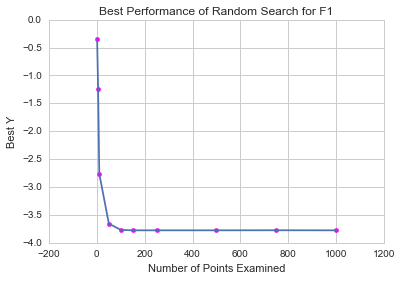

In [31]:
# Set random seed
random.seed(127)
# initialise a list of number of points to check
num_points_list = [1, 5, 10, 50, 100, 150, 250, 500, 750, 1000]

# plot performance
best_y_list = get_random_search_performance(1, num_points_list, 'f2')
print 'List of best Y value for each number of points:', best_y_list
plt.clf()
perf = plt.scatter(num_points_list, best_y_list, color = 'magenta')
perf = plt.plot(num_points_list, best_y_list)
perf = plt.xlabel('Number of Points Examined')
perf = plt.ylabel('Best Y')
perf = plt.title('Best Performance of Random Search for F1')

The performance of each improves over time as can be seen by the decrease in the graphs. However as this is a random search the best value overall may be found in any of the searches e.g. in the graph above the lowest value of y is -3.776479 which was found when 250 points were searched. A better value of y was not found when the number of points searched was increased to 1000. This is what I would expect for random search. 

## Hill Climbing  
In hill climbing the neighbours to the immediate left and right are compare with the current point and the algorithm moves to whichever is better - i.e. has a lower y value. I have continued this process until a certain number of points have been examined and optimum point is then returned.

In [32]:
# Function to take an x value and function name and return the appropriate y value
def get_y(x, function):
    if function == 'f1':
        return get_yf1(x)
    elif function == 'f2':
        return get_yf2(x)
    else:
        return Error

# Function which takes the current point, size of step to take and function name and returns the next point with the lowest y.
# If the current point has the lowest y value it is returned.
def get_next_point(current, step, function):
    current_x = current[0]
    current_y = current[1]
    y_right = get_y(current[0]+step, function)
    y_left = get_y(current[0]-step, function)
    if y_right < current_y:
        return current_x+step, y_right
    elif y_left < current[1]:
        return current_x-step, y_left
    else:
        return current

# Hill Climbing function. Takes a starting x value, step size to take, number of points to search and the function    
def hill_climbing_search(start_x, step, num_points, function):
    start = (start_x, get_y(start_x, function))
    point_count = 1
    optimum = 0
    points_searched = []
    while point_count <= num_points:
        if point_count ==1:
            optimum = get_next_point(start, step, function)
        else:
            optimum = get_next_point(optimum, step, function)
        point_count += 1
        points_searched.append(optimum)
    return points_searched, optimum
    
# function to get the performance for each num_of points and return a list of the best y value for each
def get_hc_performance(start_x, num_points_list, function, step):
    best_list = []
    for num_points in num_points_list:
        best_y = hill_climbing_search(start_x, step, num_points, function)[1][1]
        best_list.append(best_y)
    return best_list


### Plot Performance - Hill Climbing

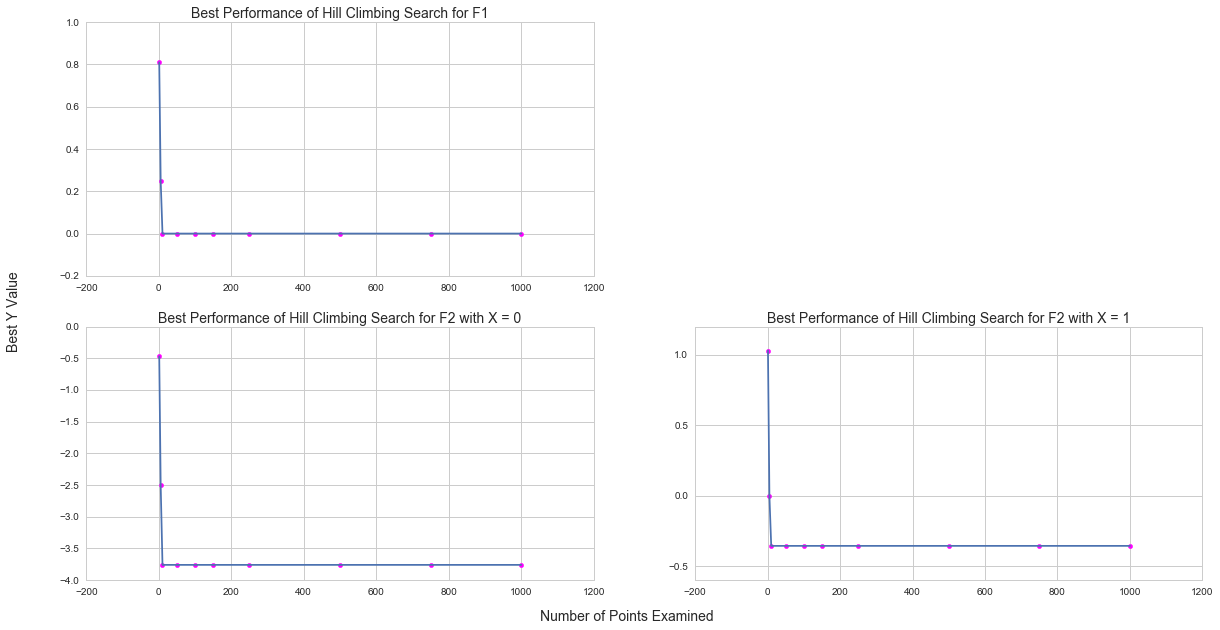

In [33]:
# Create list of number of points to find best performance for
num_points_list = [1, 5, 10, 50, 100, 150, 250, 500, 750, 1000]

plt.clf()

# Create a figure to plot the performance graphs
fig = plt.figure(figsize = (20,10))
# Set one x label and one y label
fig.text(0.5, 0.07,'Number of Points Examined', ha = 'center', fontsize = 14)
fig.text(0.07, 0.5,'Best Y Value',  va='center', rotation='vertical', fontsize = 14)

# Plot performance of hill climbing for Function 1 starting from x = 0 with step = 0.1
best_y_list1 = get_hc_performance(0, num_points_list, 'f1', 0.1)
ax1 = fig.add_subplot(221)
ax1.scatter(num_points_list, best_y_list1).set_color('magenta')
ax1.plot(num_points_list, best_y_list1)
ax1.set_title('Best Performance of Hill Climbing Search for F1',  fontsize = 14)

# Plot performance for Function 2 starting at x = 0 with step = 0.1
best_y_list2 = get_hc_performance(0, num_points_list, 'f2', 0.1)
ax2 = fig.add_subplot(223)
ax2.scatter(num_points_list, best_y_list2).set_color('magenta')
ax2.plot(num_points_list, best_y_list2)
ax2.set_title('Best Performance of Hill Climbing Search for F2 with X = 0', fontsize = 14)

# Plot performance for Function 2 starting at x = 1 with step = 0.1
best_y_list3 = get_hc_performance(1, num_points_list, 'f2', 0.1)
ax2 = fig.add_subplot(224)
ax2.scatter(num_points_list, best_y_list3).set_color('magenta')
ax2.plot(num_points_list, best_y_list3)
ax2.set_title('Best Performance of Hill Climbing Search for F2 with X = 1', fontsize = 14)

In [34]:
print 'Best for Function 1:\n', best_y_list1
print 'Best for Function 2 with x = 0:\n', best_y_list2
print 'Best for Function 2 with x = 1:\n', best_y_list3

Best for Function 1:
[0.81, 0.25, 1.232595164407831e-32, 1.232595164407831e-32, 1.232595164407831e-32, 1.232595164407831e-32, 1.232595164407831e-32, 1.232595164407831e-32, 1.232595164407831e-32, 1.232595164407831e-32]
Best for Function 2 with x = 0:
[-0.4704, -2.5, -3.7584, -3.7584, -3.7584, -3.7584, -3.7584, -3.7584, -3.7584, -3.7584]
Best for Function 2 with x = 1:
[1.0295999999999998, -9.992007221626403e-16, -0.35639999999999983, -0.35639999999999983, -0.35639999999999983, -0.35639999999999983, -0.35639999999999983, -0.35639999999999983, -0.35639999999999983, -0.35639999999999983]


**Function 1**
For function 1 the hill climbing algorithm quickly finds a minimum of 1.232595164407831e-32 after looking at 10 points. With additional points no better answer is found as the algorithm has already found the minimum value for y available for this step size.  

**Function 2**
For Function 2 the hill climbing algorithm again finds its minimum value for y very quickly after looking at just 10 points. In the case of x = 0 it finds -3.7584 which is close to the correct global minimum. By decreasing the step size to 0.05 the minimum value of y decreases to -3.7763687499999996.  
In the case of starting from x = 1 the algorithm gets stuck in the local optimum and the lowest value of y that it finds is approximately -0.3564.

### Plotting the Points Examined - Hill Climbing

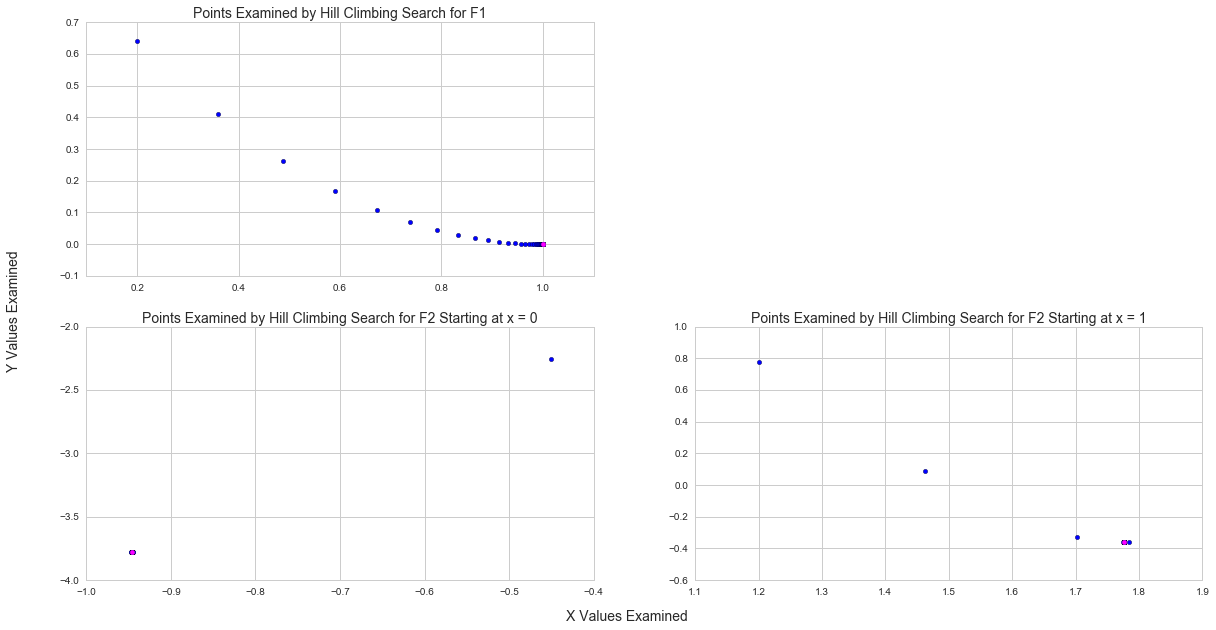

In [63]:
# Function to take the outputs from the hill climbing algorithm - list of points examined and the best point and plot this 
# in a specified position and with a specified title 
def plot_hill_climbing_points(points_examined, best_point, chart_position, title):
    zipped = zip(*points_examined)
    ax1 = fig.add_subplot(chart_position)
    ax1.scatter(zipped[0], zipped[1])
    ax1.scatter(best_point[0], best_point[1]).set_color('magenta')
    ax1.set_title(title, fontsize = 14)

# Clear previous figure
plt.clf()

# Create a figure to plot the graphs of points examined
fig = plt.figure(figsize = (20,10))

# Set one x and y label
fig.text(0.5, 0.07,'X Values Examined', ha = 'center', fontsize = 14)
fig.text(0.07, 0.5,'Y Values Examined', va='center', rotation='vertical', fontsize = 14)

# Plot points examined by hill climbing for Function 1 starting from x = 0 with step = 0.1
points_examinedf1, best_pointf1 = hill_climbing_search(0, 0.1, 50, 'f1')
plot_hill_climbing_points(points_examinedf1, best_pointf1, 221, 'Points Examined by Hill Climbing Search for F1')

# Plot points examined by hill climbing for Function 2 starting from x = 0 with step = 0.1
points_examinedf2_0, best_pointf2_0 = hill_climbing_search(0, 0.1, 50, 'f2')
plot_hill_climbing_points(points_examinedf2_0, best_pointf2_0, 223, 'Points Examined by Hill Climbing Search for F2 Starting at x = 0')

# Plot points examined by hill climbing for Function 2 starting from x = 1 with step = 0.1
points_examinedf2_1, best_pointf2_1 = hill_climbing_search(1, 0.1, 50, 'f2')
plot_hill_climbing_points(points_examinedf2_1, best_pointf2_1, 224, 'Points Examined by Hill Climbing Search for F2 Starting at x = 1')


Unlike the random search the hill climbing moves in one direction so only points to left or right of the start point are visited and show on the plots. For each plot the algorithm was run with a step size of 0.1 and number of points = 50. The best point is shown in pink on each plot. 

**Function 1**  
The hill climbing algorithm starts at x = 0 and taking steps of 0.5 it finds its best value after examining 10 points. The best y value found is 1.232595164407831e-32. The global optimum is y = 0 so this is close. The pink point is the one after which the value of y starts to increase. Regardless of how many points I tell the algorithm to examine it will not get a better value. This is why the pink dots above are slightly square as there are multiple dots plotted on top of each other. A smaller step size and increased number of points will find a lower value for y but it will be a minimal decrease.

**Function 2**  
Looking at the graphs the difference between starting at x = 0 and x = 1 is clear. Starting at x = 0 when the neighbouring values are examined the LHS value is found to be a lower value of y so the algorithm moves downhill into the global optimum. By starting at x = 1 the RHS neighbour has a lower y value so the algorithm moves downhill into a local optimum and away from the global optimum.

## Gradient Descent  
In gradient descent each step taken is proprtional to the gradient of the tangent at the current point. I used the derivative of each function to calculate the value of the gradient. The gradient times alpha was then deducted from the current x value to find the new lower point. This continues until wither the new point is too close to the old or the specified number of points has been examined.

In [58]:
# Functions to return the slope of the tangent at point x(i.e. the value of the derivative of F1 or F2 given x) 
def derivative_f1(x):
    return 2*x - 2

def derivative_f2(x):
    return 4*x**3 - 6*x**2 - 4.5*x + 4.5

# Function to take an x value and function name and returns the gradient of the tangent at that point
def get_gradient(x, function):
    if function == 'f1':
        return derivative_f1(x)
    elif function == 'f2':
        return derivative_f2(x)
    else:
        return Error
    
# Function which takes the current point, alpha value and function name and returns the next point by taking a 
# step proportional to the gradient
def get_next_point(current, alpha, function):
    current_x = current[0]
    current_y = current[1]
    gradient = get_gradient(current_x, function)
    new_x = current_x - gradient*alpha
    new_y = get_y(new_x, function)
    return new_x, new_y

# Function to find minimum using gradient descent when given start value for x, alpha value, function and number of points
def gradient_descent(start_x, alpha, function, num_points):
    current = (start_x, get_y(start_x, function))
    previous = (10, 10)
    point_count = 1
    points_examined = [current]
    while (abs(current[0] - previous[0]) > 0.00001) and (point_count <= num_points):
        previous = current
        new_current = get_next_point(current, alpha, function)
        point_count += 1
        current = new_current
        points_examined.append(current)
    return points_examined, current

# function to get the performance for each num_of points and return a list of the best y value for each
def get_gd_performance(start_x, num_points_list, function, alpha = 0):
    best_list = []
    for num_points in num_points_list:
        best_y = gradient_descent(start_x, alpha, function, num_points)[1][1]
        best_list.append(best_y)
    return best_list

### Plotting Performance - Gradient Descent 

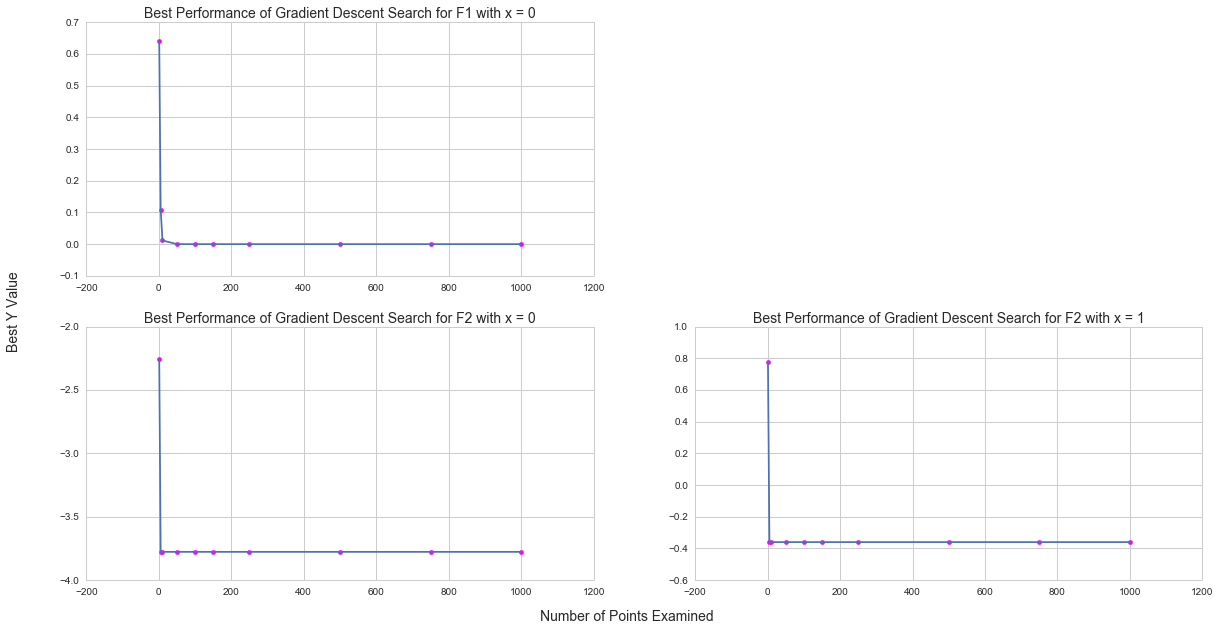

In [59]:

def plot_gradient_descent_performance(best_points, num_points_list, chart_position, title):
    ax1 = fig.add_subplot(chart_position)
    ax1.scatter(num_points_list, best_points).set_color('magenta')
    ax1.plot(num_points_list, best_points)
    ax1.set_title(title,  fontsize = 14)

# Create list of number of points to find best performance for
num_points_list = [1, 5, 10, 50, 100, 150, 250, 500, 750, 1000]

# Clear previous figure
plt.clf()

# Create a figure to plot the performance graphs
fig = plt.figure(figsize = (20,10))

# Set one x label and one y label
fig.text(0.5, 0.07,'Number of Points Examined', ha = 'center', fontsize = 14)
fig.text(0.07, 0.5,'Best Y Value',  va='center', rotation='vertical', fontsize = 14)

# Plot performance of gradient descent for Function 1 starting from x = 0 with alpha = 0.1
best_listf1 = get_gd_performance(0, num_points_list, 'f1', alpha = 0.1)
#print 'BEST LIST:', best_listf1
plot_gradient_descent_performance(best_listf1, num_points_list, 221, 'Best Performance of Gradient Descent Search for F1 with x = 0')

# Plot performance of gradient descent for Function 2 starting from x = 0 with alpha = 0.1
best_listf2_0 = get_gd_performance(0, num_points_list, 'f2', alpha = 0.1)
#print 'BEST LIST:', best_listf2_0
plot_gradient_descent_performance(best_listf2_0, num_points_list, 223, 'Best Performance of Gradient Descent Search for F2 with x = 0')

# Plot performance of gradient descent for Function 2 starting from x = 1 with alpha = 0.1
best_listf2_1 = get_gd_performance(1, num_points_list, 'f2', alpha = 0.1)
#print 'BEST LIST:', best_listf2_1
plot_gradient_descent_performance(best_listf2_1, num_points_list, 224, 'Best Performance of Gradient Descent Search for F2 with x = 1')


**Function 1**  
The minimum y value is found after checking 50 points. The value found is 1.2141680576462334e-09. After 50 points gradient descent just returns the same value so there is no improvement in performance. 

**Function 2**
When x = 0 the performance is already at the minimum y value after 5 points are examined illustrating how fast gradient descent can be at finding a solution.  
When x = 1 the minimum value of -0.3597068908946077 is found after 10 points are examined. Again this is very fast.  

When x = 1 gradient descent gets stuck in the local minimum as it has no way of finding the global minimum.

### Points Examined - Gradient Descent

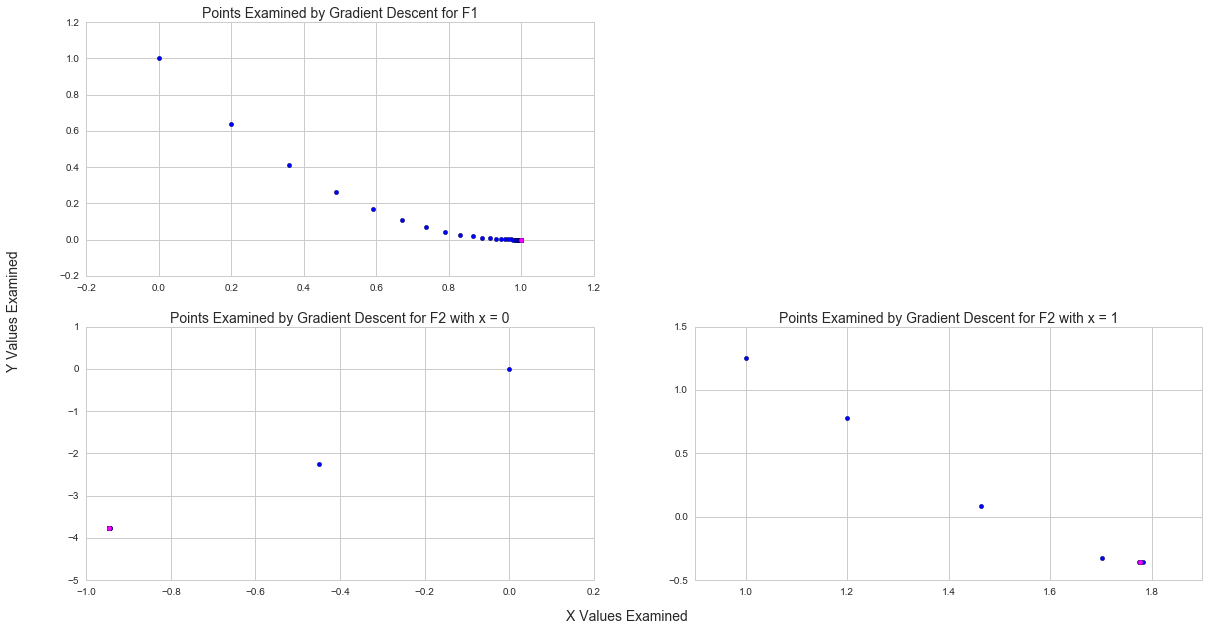

In [38]:
# Function to take the outputs from the gradient descent algorithm - list of points examined and the best point and plot this 
# in a specified position and with a specified title 
def plot_gradient_descent_points(points_examined, best_point, chart_position, title): 
    zipped = zip(*points_examined)
    ax1 = fig.add_subplot(chart_position)
    ax1.scatter(zipped[0], zipped[1])
    ax1.scatter(best_point[0], best_point[1]).set_color('magenta')
    ax1.set_title(title, fontsize = 14)

# Clear previous figure
plt.clf()

# Create a figure to plot the graphs of points examined
fig = plt.figure(figsize = (20,10))

# Set one x and y label
fig.text(0.5, 0.07,'X Values Examined', ha = 'center', fontsize = 14)
fig.text(0.07, 0.5,'Y Values Examined', va='center', rotation='vertical', fontsize = 14)

# Plot points examined by gradient descnet for Function 1 starting from x = 0 with alpha = 0.1
points_examinedf1, best_pointf1 = gradient_descent(0, 0.1, 'f1', 50)
plot_hill_climbing_points(points_examinedf1, best_pointf1, 221, 'Points Examined by Gradient Descent for F1')

# Plot points examined by gradient descnet for Function 2 starting from x = 0 with alpha = 0.1
points_examinedf2_0, best_pointf2_0 = gradient_descent(0, 0.1, 'f2', 50)
plot_hill_climbing_points(points_examinedf2_0, best_pointf2_0, 223, 'Points Examined by Gradient Descent for F2 with x = 0')

# Plot points examined by gradient descnet for Function 2 starting from x = 1 with alpha = 0.1
points_examinedf2_1, best_pointf2_1 = gradient_descent(1, 0.1, 'f2', 50)
plot_hill_climbing_points(points_examinedf2_1, best_pointf2_1, 224, 'Points Examined by Gradient Descent for F2 with x = 1')


I ran each function with parameter alpha = 0.1 and number of points = 50. The best point is shown in pink on each graph.

**Function 1**  
The shape of the plot is similar to that of the hill climbing but the steps are not regular in size. Gradient descent makes moves proportional to the gradient of the tangent at each point examined. I think the graph for function 1 illustrates this very well. The size of the moves closest to the minimum are much much smaller than those at the start and you can see the points start to converge. The minimum value of y when given 50 points to examine is 1.2141680576462334e-09.

**Function 2**  
When x is 0, gradient descent on function 2 finds the minimum very quickly. After two steps the minimun y value is -3.776485150351287 and all other moves are then just refining this. Again the graph shows clearly the size of the jumps and how quickly gradient descent starts to converge.  
When x = 1 the convergence is a little slower but gradient descent still finds a minimum very quickly. The minimum value returned is 0.3597068908946077 after 11 moves. At this point there wasn't enough of a difference so the function stopped.   

When x = 1 gradient descent finds the local minimum and gets stuck there, because it only travels in one direction it cannot get out of the local minimum so gradient descent starting at x =1 will never find the global minimum.

## Simulated Annealing  
Simulated annealing allows for the algorithm to make moves that are 'worse' at the start so that it can avoid local optima. If the new point is better than the current point the algorithm will move to the new point. Otherwise an acceptable probability function is calculated and compared with a random number between 0 and 1. If the acceptable probability is greater than the random number then the algorithm moves to the neighbour even thouse it has a higher y value. The probability is a function of temperature and the difference in y value between the cuurrent point and the neighbour. The temperature is multiplied by alpha on each loop iteration to reduce it.

In [55]:
# Function to return the acceptance probability 
def get_acceptance_probability(y_current, y_new, temp):
    return math.exp((y_current - y_new)/temp)

# Function to choose a neighbouring point. The neighbour is the existing x plus/minus a random value between 0 and 1
def get_neighbour(x, function):
    choice = random.randint(0,2)
    change = random.random()
    neighbour_x = 0
    neighbour_y = 0
    if choice == 0:
        neighbour_x = neighbour_x-change
        neighbour_y = get_y(neighbour_x, function)
    else:
        neighbour_x = neighbour_x+change
        neighbour_y = get_y(neighbour_x, function)
    return neighbour_x, neighbour_y

# Function to carry out simulated annealing given a start value of x, start temperature, value to use for alpha and function
# The function returns a list of the points looked at and the minimum point found
def simulated_annealing(start_x, temp , alpha, function):
    current = (start_x, get_y(start_x, function))
    best = current
    probability = 0
    points_list = []
    while temp > 0.0001: 
        neighbour = get_neighbour(current[0], function)
        if neighbour[1] < current[1]:
            current = neighbour
            if neighbour[1] < best[1]:
                best = neighbour
        else:
            probability = get_acceptance_probability(current[1], neighbour[1], temp)
            if probability > random.uniform(0,1):
                current  = neighbour
                if neighbour[1] < best[1]:
                    best = neighbour
        temp = temp*alpha
        points_list.append(current)
    return points_list, best

# function to get the performance for each num_of points and return a list of the best y value for each
def get_simulated_annealing_performance(start_x, num_points_list, temp, alpha, function):
    best_list = []
    for num_points in num_points_list:
        best_y = simulated_annealing(start_x, temp , alpha, function)[1][1]
        best_list.append(best_y)
    return best_list

### Points Examined - Simulated Annealing

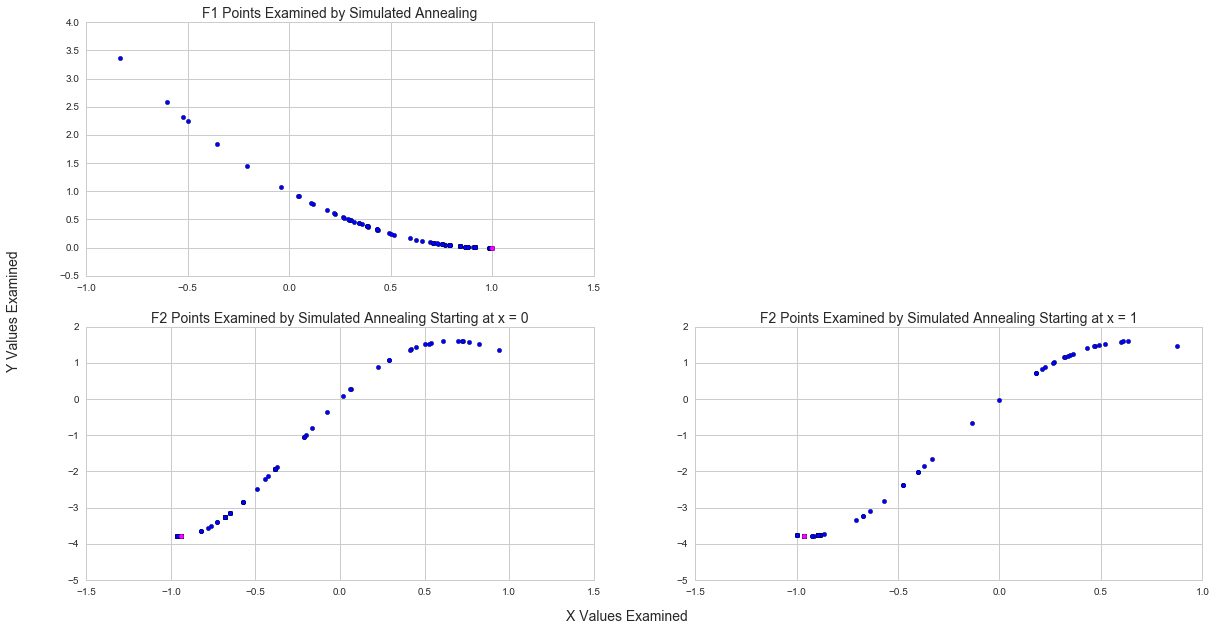

In [64]:
# Function to take the outputs from the simulated annealing algorithm - list of points examined and the best point and plot 
# in a specified position and with a specified title 
def plot_simulated_annealing_points(points_examined, best_point, chart_position, title): 
    zipped = zip(*points_examined)
    ax1 = fig.add_subplot(chart_position)
    ax1.scatter(zipped[0], zipped[1])
    ax1.scatter(best_point[0], best_point[1]).set_color('magenta')
    ax1.set_title(title, fontsize = 14)

# Clear previous figure
plt.clf()

# Create a figure to plot the graphs of points examined
fig = plt.figure(figsize = (20,10))

# Set one x and y label
fig.text(0.5, 0.07,'X Values Examined', ha = 'center', fontsize = 14)
fig.text(0.07, 0.5,'Y Values Examined', va='center', rotation='vertical', fontsize = 14)

random.seed(901)
# Plot points examined by simulated annealing for Function 1 starting from x = 0, temp 100 with alpha = 0.9
points_examinedf1, best_pointf1 = simulated_annealing(0, 100, 0.9, 'f1')
plot_simulated_annealing_points(points_examinedf1, best_pointf1, 221, 'F1 Points Examined by Simulated Annealing')

# Plot points examined by simulated annealing for Function 2 starting from x = 0, temp 100 with alpha = 0.9
points_examinedf2_0, best_pointf2_0 = simulated_annealing(0, 100, 0.9, 'f2')
plot_simulated_annealing_points(points_examinedf2_0, best_pointf2_0, 223, 'F2 Points Examined by Simulated Annealing Starting at x = 0')

# Plot points examined by simulated annealing for Function 2 starting from x = 1, temp 100 with alpha = 0.9
points_examinedf2_1, best_pointf2_1 = simulated_annealing(1, 100, 0.9, 'f2')
plot_simulated_annealing_points(points_examinedf2_1, best_pointf2_1, 224, 'F2 Points Examined by Simulated Annealing Starting at x = 1')


I plotted each with temperature 100 and alpha 0.9. The best point is shown in pink on each graph.

**Function 1**  
From the plot I can see that, unlike gradient descent and hill climbing, simulated annealing has looked at a number of points that are larger/worse than the start point of x = 0 before finding the minimum point. 

**Function 2**  
With x = 0 simulated annealing looks at number of points with higher y values and even goes into the valley of the next minimum but it does find the global minimum around y = -3.77. With x = 1 the plot is very similar. It finds the global minimum. I can see on the F2 plots that the algorithm slightly overshoots the global minimum in its search which is to be expected.

Simulated annealing was able to f ind the global minimum for F2 without getting stuck in the local minimum like gradient descent and hill climbing. This makes it better for problems which are not convex.

### Plot Performance - Simulated Annealing

BEST LIST: [1.5492917373308823e-06, 3.687441988416804e-05, 5.811049140902203e-08, 4.001679466852751e-06, 2.1727919367733497e-06, 5.6484456904199435e-05, 1.7146329484123915e-05, 0.000894322391099998, 0.0008040532783514302, 1.3091066835878903e-05, 2.4311479616420613e-06, 7.140852666634846e-06]
BEST LIST: [-3.7764208724090307, -3.7762384171061236, -3.776505066972121, -3.7764985066773433, -3.774381387303175, -3.7764606690890448, -3.7755730924779662, -3.7750451142170998, -3.7758244444264655, -3.776293437530903, -3.776350782608707, -3.776136815385273]
BEST LIST: [-3.7764982745774445, -3.76758580818214, -3.776183021201824, -3.776363209272839, -3.7765047730992833, -3.7757461489236954, -3.7753188344320114, -3.7758291576481238, -3.775077797591263, -3.7764908878771846, -3.77470993926237, -3.7759809383125975]


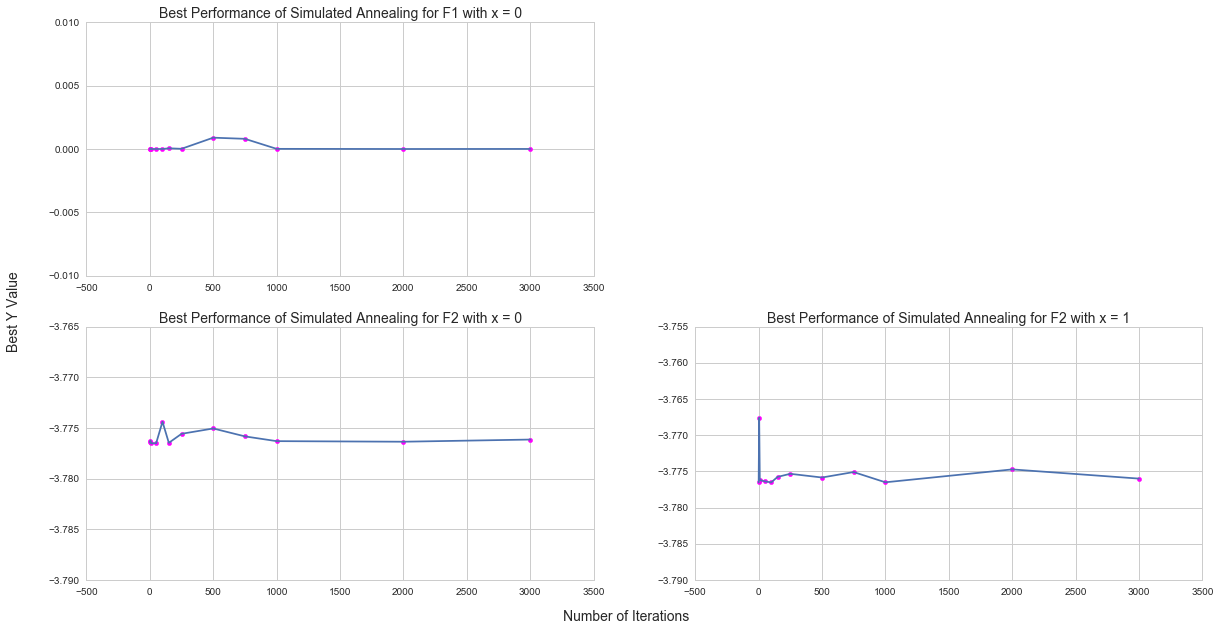

In [67]:
# Function to plot the performance of the function over the number of iterations
def plot_simulated_annealing_performance(best_points, num_iterations_list, chart_position, title):
    ax1 = fig.add_subplot(chart_position)
    ax1.scatter(num_iterations_list, best_points).set_color('magenta')
    ax1.plot(num_iterations_list, best_points)
    ax1.set_title(title, fontsize = 14)

# Create list of number of points to find best performance for
num_points_list = [1, 5, 10, 50, 100, 150, 250, 500, 750, 1000, 2000, 3000]

# Clear previous figure
plt.clf()

# Create a figure to plot the performance graphs
fig = plt.figure(figsize = (20,10))
# Set one x label and one y label
fig.text(0.5, 0.07,'Number of Iterations', ha = 'center', fontsize = 14)
fig.text(0.07, 0.5,'Best Y Value',  va='center', rotation='vertical', fontsize = 14)

random.seed(901)
# Plot performance of simulated annealing for Function 1 starting from x = 0, temp = 100 with alpha = 0.9
best_listf1 = get_simulated_annealing_performance(0, num_points_list, 100, 0.9, 'f1')
print 'BEST LIST:', best_listf1
plot_simulated_annealing_performance(best_listf1, num_points_list, 221, 'Best Performance of Simulated Annealing for F1 with x = 0')

# Plot performance of simulated annealing for Function 1 starting from x = 0, temp = 100 with alpha = 0.9
best_listf2_0 = get_simulated_annealing_performance(0, num_points_list, 100, 0.9, 'f2')
print 'BEST LIST:', best_listf2_0
plot_simulated_annealing_performance(best_listf2_0, num_points_list, 223, 'Best Performance of Simulated Annealing for F2 with x = 0') 

# Plot performance of simulated annealing for Function 2 starting from x = 1, temp = 100 with alpha = 0.9
best_listf2_1 = get_simulated_annealing_performance(1, num_points_list, 100, 0.9, 'f2')
print 'BEST LIST:', best_listf2_1
plot_simulated_annealing_performance(best_listf2_1, num_points_list, 224, 'Best Performance of Simulated Annealing for F2 with x = 1')


The performance for each with start temperature 100 and alpha 0.9 are shown above.

The performance jumps around a bit more than I expected. I tought that with more iterations I would see smoother plots getting lower with more iterations but this is not the case. I think this is to do with how likely my algorithm is to accept a worse result - possibly need to tune the value of temperature and alpha. I did try some different values but didn't see a great imrpovement. The lowest value found by each is correct but there is more variation than I expected. I have tried running for larger numbers of iterations but this doesn't really improve the graphs.